<a href="https://colab.research.google.com/github/MSURENDRAN/ADVANCE_MACHINE_LEARNING_LAB/blob/main/2348527_Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.read_csv('/content/Program_2_Dataset.csv')
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
x = df[['Avg_rooms ','Distance','Property_TaxRate','Non_Retail_Acres']]
y = df['MValue']

In [ ]:
vif = pd.Series([variance_inflation_factor(x.values,idx)
                for idx in range(x.shape[1])],
                index = x.columns)

print(vif)

Avg_rooms           16.747965
Distance             6.880607
Property_TaxRate    13.861510
Non_Retail_Acres     9.598374
dtype: float64


In [ ]:
x = x.drop(columns = ['Distance','Non_Retail_Acres'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=32)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

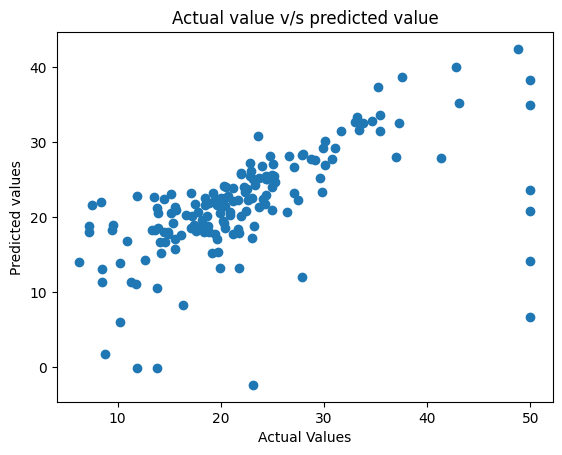

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual value v/s predicted value')
plt.show()

In [ ]:
print('Coefficiants',model.coef_)
print('Intercept',model.intercept_)

Coefficiants [ 8.24252554 -0.01860448]
Intercept -21.84453808776138


In [ ]:
print('Mean Squared Error values',metrics.mean_squared_error(y_test, y_pred))

rs = (metrics.r2_score(y_test, y_pred))
print('R-squared',rs)

Mean Squared Error values 55.8969993937982
R-squared 0.34121403762677005


In [ ]:
ars = 1 - ((1 - rs) * (x - 1)/(x-y-1))
print(ars)

      0   1   2   3   4   5   6   7   8   9  ...  498  499  500  501  502  \
0   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
2   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
3   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
4   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...   
501 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
502 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
503 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
504 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
505 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   

     503  504  505  Avg_rooms   Property_TaxRate  
0    NaN  NaN  NaN      